## UK Traffic Accidents Data Analysis and Visualization

The traffic accidents data of UK, belonging to the years of 2012, 2013 and 2014 will be analyzed and visualized in that study. The data is retreived from Kaggle. 

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [3]:
cols = np.arange(9, 31, 1)

In [4]:
cols

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30])

In [5]:
df = pd.read_csv('accidents.csv', usecols = cols)

In [5]:
df.head()

,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,19/01/2012,5,20:35,12,E09000020,3,308,Single carriageway,30,NaN,...,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes
1,04/01/2012,4,17:00,1,E09000033,4,412,Single carriageway,30,NaN,...,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes
2,10/01/2012,3,10:07,12,E09000020,3,3220,One way street,30,NaN,...,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
3,18/01/2012,4,12:20,12,E09000020,5,0,Single carriageway,30,NaN,...,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
4,17/01/2012,3,20:24,12,E09000020,4,325,Single carriageway,30,NaN,...,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes


In [6]:
df.shape

(464697, 22)

In [7]:
df.size

10223334

In [20]:
df.dtypes

Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_Detail                                float64
Junction_Control                                object
2nd_Road_Class                                   int64
2nd_Road_Number                                  int64
Pedestrian_Crossing-Human_Control               object
Pedestrian_Crossing-Physical_Facilities         object
Light_Conditions                                object
Weather_Conditions                              object
Road_Surface_Conditions                         object
Special_Co

In [28]:
df.isnull().sum()

Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail                                464697
Junction_Control                               178610
2nd_Road_Class                                      0
2nd_Road_Number                                     0
Pedestrian_Crossing-Human_Control                   0
Pedestrian_Crossing-Physical_Facilities             0
Light_Conditions                                    0
Weather_Conditions                                  0
Road_Surface_Conditions                           755
Special_Conditions_at_Site  

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Day_of_Week,464697.0,4.108740,1.916429,1.0,2.0,4.0,6.0,7.0
Local_Authority_(District),464697.0,329.123829,259.222621,1.0,95.0,300.0,511.0,941.0
1st_Road_Class,464697.0,4.070136,1.413850,1.0,3.0,3.0,6.0,6.0
1st_Road_Number,464697.0,1012.728324,1810.523701,0.0,0.0,147.0,759.0,9999.0
Speed_limit,464697.0,38.229793,13.800546,10.0,30.0,30.0,40.0,70.0
Junction_Detail,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd_Road_Class,464697.0,2.786293,3.187084,-1.0,-1.0,3.0,6.0,6.0
2nd_Road_Number,464697.0,380.952317,1289.786824,-1.0,0.0,0.0,0.0,9999.0
Urban_or_Rural_Area,464697.0,1.337426,0.472832,1.0,1.0,1.0,2.0,2.0


In [8]:
df.groupby(['Urban_or_Rural_Area'])['Date'].count()

Urban_or_Rural_Area
1    307896
2    156801
Name: Date, dtype: int64

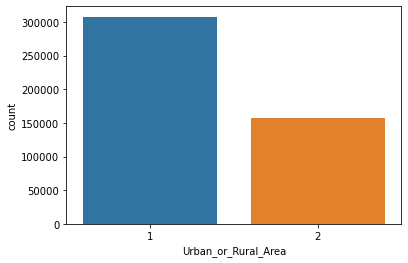

In [11]:
sns.countplot(x="Urban_or_Rural_Area", data=df);

In [119]:
area = df.groupby(['Urban_or_Rural_Area'])['Date'].count()

In [120]:
area = pd.DataFrame(area)

In [121]:
area.head()

,Date
Urban_or_Rural_Area,
1,307896
2,156801


In [124]:
area.reset_index(inplace = True)

In [125]:
area.head()

,Urban_or_Rural_Area,Date
0,1,307896
1,2,156801


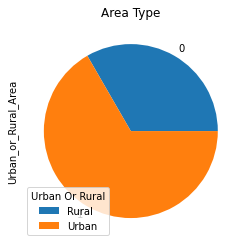

In [130]:
area.plot.pie(y="Urban_or_Rural_Area").set_title("Area Type");
plt.legend(title="Urban Or Rural",labels=["Rural","Urban"])

In [30]:
df['Light_Conditions'].unique()

array(['Darkness: Street lights present and lit',
       'Daylight: Street light present', 'Darkeness: No street lighting',
       'Darkness: Street lights present but unlit',
       'Darkness: Street lighting unknown'], dtype=object)

In [91]:
df['1st_Road_Class'].unique()

array([3, 4, 5, 6, 1, 2], dtype=int64)

In [92]:
df.groupby(['1st_Road_Class'])['Date'].count()

1st_Road_Class
1     16556
2      1347
3    216232
4     59071
5     41796
6    129695
Name: Date, dtype: int64

In [94]:
df['2nd_Road_Class'].unique()

array([ 5,  6,  3,  4, -1,  1,  2], dtype=int64)

In [93]:
df.groupby(['2nd_Road_Class'])['Date'].count()

2nd_Road_Class
-1    181794
 1      3132
 2       346
 3     47690
 4     18911
 5     22906
 6    189918
Name: Date, dtype: int64

In [34]:
df.groupby(['Light_Conditions'])['Date'].count()

Light_Conditions
Darkeness: No street lighting                 22999
Darkness: Street lighting unknown              6853
Darkness: Street lights present and lit       91158
Darkness: Street lights present but unlit      2563
Daylight: Street light present               341124
Name: Date, dtype: int64

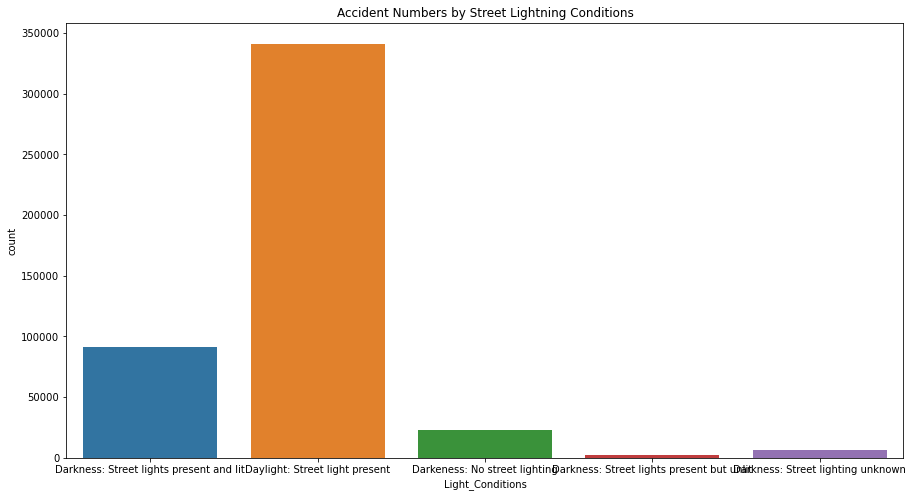

In [82]:
plt.figure(figsize=(15,8));

sns.countplot(x='Light_Conditions', data=df).set_title("Accident Numbers by Street Lightning Conditions");

#sns.set(rc={'figure.figsize':(18,20)})

In [36]:
df.groupby(['Weather_Conditions'])['Date'].count()

Weather_Conditions
Fine with high winds            5011
Fine without high winds       373167
Fog or mist                     2411
Other                           8272
Raining with high winds         7120
Raining without high winds     57060
Snowing with high winds          733
Snowing without high winds      2708
Unknown                         8215
Name: Date, dtype: int64

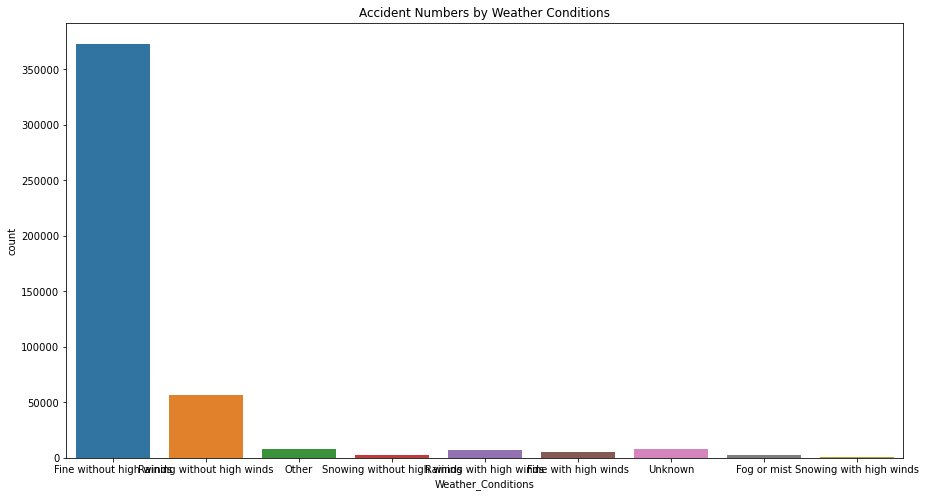

In [79]:
ax = plt.figure(figsize=(15,8));
sns.countplot(x='Weather_Conditions', data=df).set_title("Accident Numbers by Weather Conditions");

In [37]:
df['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)', nan], dtype=object)

In [38]:
df.groupby(['Road_Surface_Conditions'])['Date'].count()

Road_Surface_Conditions
Dry                          319370
Flood (Over 3cm of water)       863
Frost/Ice                      8140
Snow                           2824
Wet/Damp                     132745
Name: Date, dtype: int64

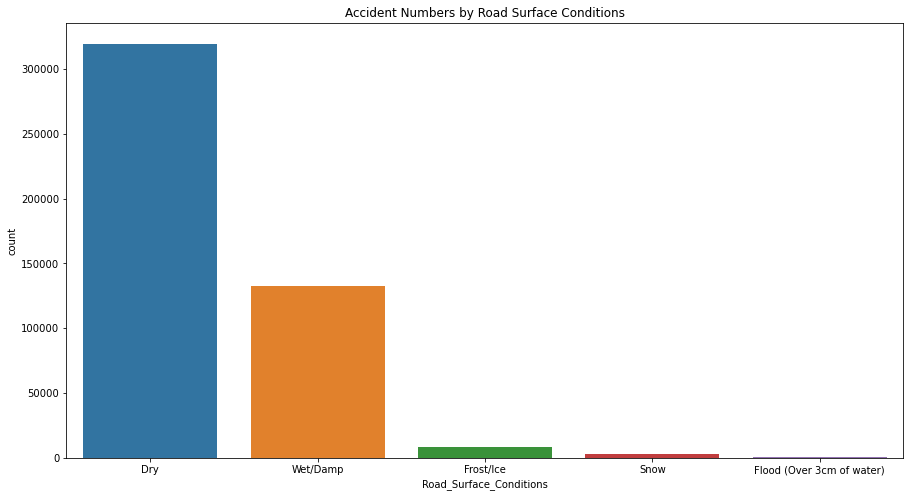

In [78]:
ax = plt.figure(figsize=(15,8));
sns.countplot(x='Road_Surface_Conditions', data=df).set_title("Accident Numbers by Road Surface Conditions");

In [40]:
df['Speed_limit'].unique()

array([30, 50, 40, 20, 70, 60, 10], dtype=int64)

In [41]:
df.groupby(['Speed_limit'])['Date'].count()

Speed_limit
10         1
20      9055
30    304842
40     37538
50     17312
60     64465
70     31484
Name: Date, dtype: int64

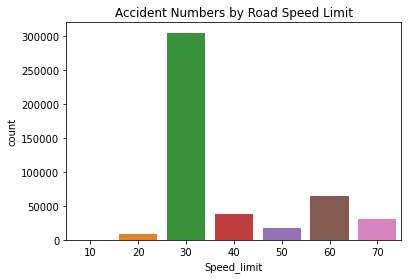

In [77]:
sns.countplot(x='Speed_limit', data=df).set_title("Accident Numbers by Road Speed Limit");

In [43]:
df['Road_Type'].unique()

array(['Single carriageway', 'One way street', 'Roundabout',
       'Dual carriageway', 'Slip road', 'Unknown'], dtype=object)

In [45]:
df.groupby(['Road_Type'])['Date'].count()

Road_Type
Dual carriageway       65998
One way street          9074
Roundabout             31852
Single carriageway    351268
Slip road               4827
Unknown                 1678
Name: Date, dtype: int64

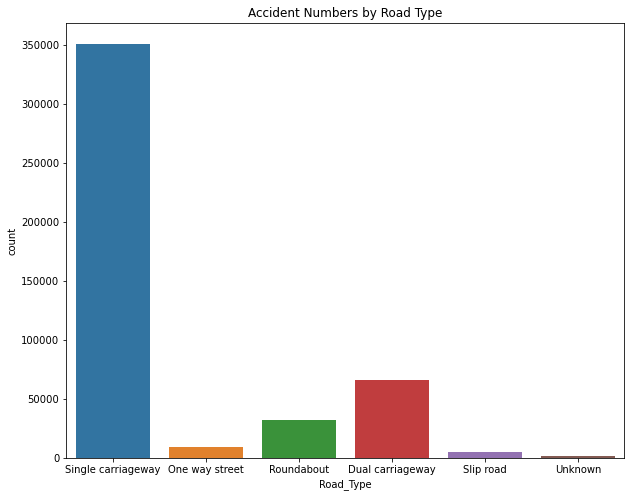

In [76]:
ax = plt.figure(figsize=(10,8));
sns.countplot(x='Road_Type', data=df).set_title("Accident Numbers by Road Type");

In [7]:
df['Date'].head()

0    19/01/2012
1    04/01/2012
2    10/01/2012
3    18/01/2012
4    17/01/2012
Name: Date, dtype: object

In [8]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Date'].head()

0   2012-01-19
1   2012-04-01
2   2012-10-01
3   2012-01-18
4   2012-01-17
Name: Date, dtype: datetime64[ns]

In [10]:
df['Year'] = df['Date'].map(lambda x: x.year)

In [11]:
df.head()

,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,2012-01-19,5,20:35,12,E09000020,3,308,Single carriageway,30,NaN,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012
1,2012-04-01,4,17:00,1,E09000033,4,412,Single carriageway,30,NaN,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012
2,2012-10-01,3,10:07,12,E09000020,3,3220,One way street,30,NaN,...,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012
3,2012-01-18,4,12:20,12,E09000020,5,0,Single carriageway,30,NaN,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012
4,2012-01-17,3,20:24,12,E09000020,4,325,Single carriageway,30,NaN,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012


In [12]:
df.groupby(['Year'])['Date'].count()

Year
2012    179715
2013    138660
2014    146322
Name: Date, dtype: int64

In [13]:
df["Month"] = df['Date'].map(lambda x: x.month)

In [14]:
df.groupby(['Month'])['Date'].count()

Month
1     38679
2     34230
3     38302
4     37156
5     40017
6     38924
7     40885
8     38590
9     39042
10    41001
11    41225
12    36646
Name: Date, dtype: int64

In [71]:
months = df.groupby(['Month'])['Date'].count()

In [72]:
months

Month
1     38679
2     34230
3     38302
4     37156
5     40017
6     38924
7     40885
8     38590
9     39042
10    41001
11    41225
12    36646
Name: Date, dtype: int64

In [73]:
months = pd.DataFrame(months)

In [74]:
months

,Date
Month,
1,38679
2,34230
3,38302
4,37156
5,40017
6,38924
7,40885
8,38590
9,39042


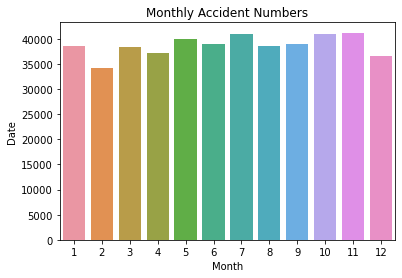

In [75]:
sns.barplot(y=months['Date'], x = months.index, data=months).set_title("Monthly Accident Numbers");

In [83]:
year = df.groupby(['Year'])['Date'].count()

In [84]:
year

Year
2012    179715
2013    138660
2014    146322
Name: Date, dtype: int64

In [85]:
year = pd.DataFrame(year)

In [86]:
year

,Date
Year,
2012,179715
2013,138660
2014,146322


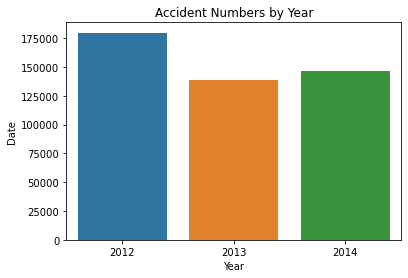

In [87]:
sns.barplot(y=year['Date'], x = year.index, data=year).set_title("Accident Numbers by Year");

In [88]:
df.corr()

,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year,Month
Day_of_Week,1.000000,-0.002014,0.004594,0.003172,-0.015876,NaN,0.011538,-0.000495,-0.018107,-0.002890,0.009134
Local_Authority_(District),-0.002014,1.000000,0.056267,0.019247,0.212592,NaN,-0.124897,-0.018911,0.263910,0.071632,0.001385
1st_Road_Class,0.004594,0.056267,1.000000,-0.083800,-0.380226,NaN,0.098219,-0.030052,-0.213495,0.003845,-0.003817
1st_Road_Number,0.003172,0.019247,-0.083800,1.000000,-0.067390,NaN,0.031523,0.186657,-0.018386,-0.004414,-0.002374
Speed_limit,-0.015876,0.212592,-0.380226,-0.067390,1.000000,NaN,-0.336064,-0.047418,0.680879,0.008236,0.004126
Junction_Detail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd_Road_Class,0.011538,-0.124897,0.098219,0.031523,-0.336064,NaN,1.000000,0.148090,-0.291616,-0.002317,-0.003796
2nd_Road_Number,-0.000495,-0.018911,-0.030052,0.186657,-0.047418,NaN,0.148090,1.000000,-0.039443,-0.005371,-0.001579
Urban_or_Rural_Area,-0.018107,0.263910,-0.213495,-0.018386,0.680879,NaN,-0.291616,-0.039443,1.000000,0.017433,0.003570
Year,-0.002890,0.071632,0.003845,-0.004414,0.008236,NaN,-0.002317,-0.005371,0.017433,1.000000,0.006891


In [15]:
hours = pd.DataFrame(df["Time"].astype("datetime64"))

In [16]:
hours.head()

,Time
0,2022-05-11 20:35:00
1,2022-05-11 17:00:00
2,2022-05-11 10:07:00
3,2022-05-11 12:20:00
4,2022-05-11 20:24:00


In [17]:
hours = hours['Time'].dt.hour

In [18]:
hours.head()

0    20.0
1    17.0
2    10.0
3    12.0
4    20.0
Name: Time, dtype: float64

In [19]:
hours = pd.DataFrame(hours)

In [20]:
hours.head()

,Time
0,20.0
1,17.0
2,10.0
3,12.0
4,20.0


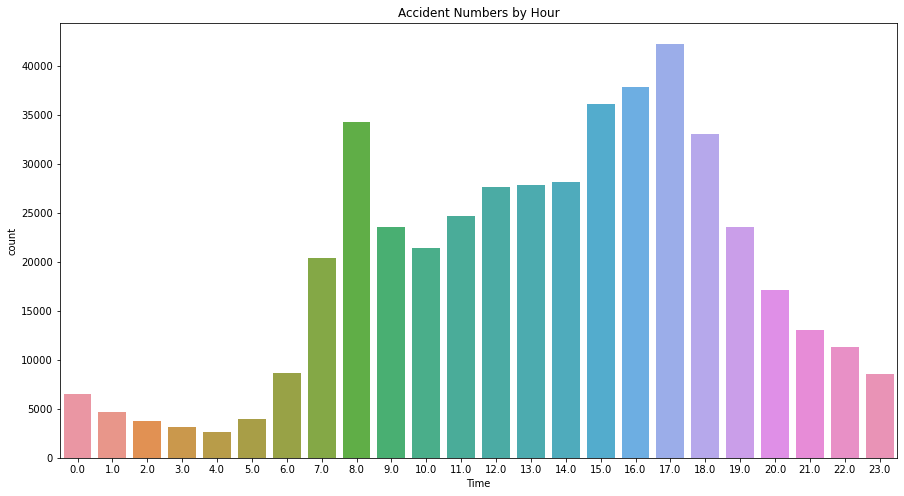

In [21]:
ax = plt.figure(figsize=(15,8));
sns.countplot(data = hours, x = 'Time').set_title("Accident Numbers by Hour");

In [22]:
cols = np.arange(0, 31, 1)

In [23]:
df2 = pd.read_csv('accidents.csv', usecols = cols)

In [133]:
df2.groupby(['Accident_Severity'])['Date'].count()

Accident_Severity
1      5303
2     66784
3    392610
Name: Date, dtype: int64

In [135]:
df2.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area
Location_Easting_OSGR,1.000000,-0.443488,0.999394,-0.445512,-0.341086,0.033165,0.014412,-0.042245,-0.002260,-0.365255,-0.059309,-0.099017,-0.069761,NaN,0.057491,-0.024555,-0.108093
Location_Northing_OSGR,-0.443488,1.000000,-0.452043,0.999974,0.153230,-0.031794,-0.032548,0.034086,0.006142,0.114367,0.053008,0.055043,0.064186,NaN,-0.047574,0.050909,0.063538
Longitude,0.999394,-0.452043,1.000000,-0.453969,-0.353312,0.033144,0.015349,-0.040972,-0.002335,-0.374428,-0.058011,-0.096585,-0.069084,NaN,0.057676,-0.022418,-0.106236
Latitude,-0.445512,0.999974,-0.453969,1.000000,0.151249,-0.031863,-0.032358,0.034239,0.006144,0.112716,0.053068,0.055946,0.063912,NaN,-0.047352,0.051648,0.063078
Police_Force,-0.341086,0.153230,-0.353312,0.151249,1.000000,-0.039979,-0.005590,0.012450,-0.001216,0.982313,0.046606,0.007602,0.204729,NaN,-0.123164,-0.022331,0.248518
Accident_Severity,0.033165,-0.031794,0.033144,-0.031863,-0.039979,1.000000,0.078750,-0.060358,0.003478,-0.043415,-0.000410,-0.007502,-0.073219,NaN,0.059245,0.022077,-0.079522
Number_of_Vehicles,0.014412,-0.032548,0.015349,-0.032358,-0.005590,0.078750,1.000000,0.252533,0.003376,-0.001769,-0.147088,-0.008277,0.089665,NaN,0.064620,0.022293,0.044852
Number_of_Casualties,-0.042245,0.034086,-0.040972,0.034239,0.012450,-0.060358,0.252533,1.000000,0.000407,0.019785,-0.082932,0.006743,0.141020,NaN,-0.030371,0.003012,0.114752
Day_of_Week,-0.002260,0.006142,-0.002335,0.006144,-0.001216,0.003478,0.003376,0.000407,1.000000,-0.002014,0.004594,0.003172,-0.015876,NaN,0.011538,-0.000495,-0.018107
Local_Authority_(District),-0.365255,0.114367,-0.374428,0.112716,0.982313,-0.043415,-0.001769,0.019785,-0.002014,1.000000,0.056267,0.019247,0.212592,NaN,-0.124897,-0.018911,0.263910


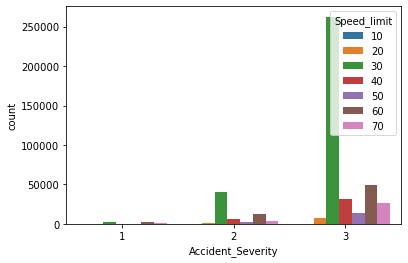

In [138]:
sns.countplot(data = df2, x='Accident_Severity', hue='Speed_limit');

In [144]:
severity_speed = df2.groupby(['Accident_Severity'])['Speed_limit'].mean()

In [147]:
severity_speed = pd.DataFrame(severity_speed)

In [148]:
severity_speed

,Speed_limit
Accident_Severity,
1,47.608901
2,39.566962
3,37.875653


In [154]:
severity_speed.reset_index(inplace=True)

In [156]:
severity_speed

,Accident_Severity,Speed_limit
0,1,47.608901
1,2,39.566962
2,3,37.875653


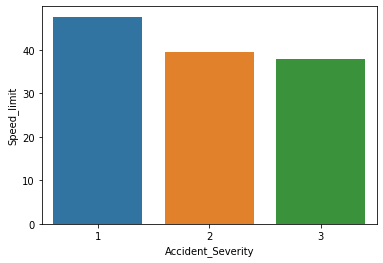

In [161]:
sns.barplot(data = severity_speed, x = 'Accident_Severity', y = 'Speed_limit');

Data Source: Kaggle. 1.6 million UK traffic accidents. Retrieved from: https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales. Access date: 11.05.2022